# Inverse Correlation Project

### Initial imports

In [96]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import seaborn as sns
import hvplot.pandas

%matplotlib inline

### Loading .env environment variables

In [97]:
load_dotenv()

True

### Setting Alpaca API key and secret

In [98]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

### Verifying that Alpaca key and secret were correctly loaded

In [99]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


### Creating the Alpaca API object

In [100]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

### Formatting current date as ISO format

In [101]:
start = pd.Timestamp("2015-12-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-09-20", tz="America/New_York").isoformat()

### Setting the tickers

In [102]:
tickers = ['SPGI',
'MCO',
'CPRT',
'EFX',
'FLT',
'CRL',
'OMC',
'IPG',
'RHI',
'NLSN',
'VZ',
'T',
'TMUS',
'LUMN',
'TSLA',
'GM',
'F',
'ATVI',
'EA',
'DHI',
'SWK',
'TTWO',
'NVR',
'LKQ',
'PHM',
'WHR',
'HAS',
'MHK',
'SNA',
'PG',
'NKE',
'KO',
'PEP',
'PM',
'EL',
'MDLZ',
'MO',
'CL',
'MNST',
'KMB',
'STZ',
'KHC',
'GIS',
'HSY',
'IFF',
'BF.B',
'TSN',
'VFC',
'HRL',
'MKC',
'CHD',
'K',
'CLX',
'CAG',
'SJM',
'CPB',
'TAP',
'LW',
'UAA',
'UA',
'PVH',
'DIS',
'CMCSA',
'MCD',
'SBUX',
'CHTR',
'BKNG',
'MAR',
'CMG',
'CTAS',
'HLT',
'YUM',
'LVS',
'EXPE',
'LYV',
'MGM',
'VIAC',
'FOX',
'FOXA',
'RCL',
'DPZ',
'CZR',
'DRI',
'DISH',
'ROL',
'NWSA',
'NWS',
'DISCA',
'DISCK',
'WYNN',
'NCLH',
'PENN',
'SYY',
'MCK',
'FAST',
'ABC',
'GWW',
'POOL',
'GPC',
'CAH',
'HSIC',
'AAPL',
'NVDA',
'AVGO',
'INTC',
'QCOM',
'AMD',
'TXN',
'RTX',
'BA',
'MU',
'LRCX',
'LMT',
'ADI',
'KLAC',
'NXPI',
'NOC',
'GD',
'XLNX',
'FTNT',
'TEL',
'APH',
'MCHP',
'MSI',
'ANET',
'LHX',
'HPQ',
'KEYS',
'TDG',
'GLW',
'ZBRA',
'TER',
'SWKS',
'FTV',
'GRMN',
'STX',
'ENPH',
'MPWR',
'TRMB',
'HPE',
'TDY',
'WDC',
'NTAP',
'QRVO',
'TXT',
'FFIV',
'HWM',
'IPGP',
'HII',
'XOM',
'CVX',
'COP',
'EOG',
'PXD',
'MPC',
'PSX',
'VLO',
'DVN',
'OXY',
'HES',
'FANG',
'CTRA',
'MRO',
'APA',
'BRK.B',
'JPM',
'V',
'BAC',
'MA',
'WFC',
'MS',
'SCHW',
'BLK',
'AMT',
'GS',
'AXP',
'PLD',
'C',
'CCI',
'PNC',
'USB',
'MMC',
'CB',
'CME',
'EQIX',
'ICE',
'PSA',
'AON',
'COF',
'PGR',
'MET',
'SPG',
'DLR',
'BK',
'AIG',
'TROW',
'SBAC',
'PRU',
'O',
'SIVB',
'AFL',
'TRV',
'WELL',
'CBRE',
'AVB',
'FRC',
'DFS',
'AJG',
'ARE',
'STT',
'AMP',
'EQR',
'ALL',
'NDAQ',
'WY',
'FITB',
'EXR',
'WLTW',
'MAA',
'SYF',
'DRE',
'NTRS',
'URI',
'HIG',
'ESS',
'RF',
'RJF',
'VTR',
'CFG',
'MTB',
'PEAK',
'BRO',
'PFG',
'SBNY',
'UDR',
'CINF',
'BXP',
'BEN',
'KIM',
'IRM',
'MKTX',
'L',
'WRB',
'CBOE',
'REG',
'LNC',
'HST',
'CMA',
'IVZ',
'RE',
'FRT',
'ZION',
'GL',
'AIZ',
'VNO',
'PBCT',
'UNH',
'ANTM',
'HCA',
'CI',
'HUM',
'IQV',
'CNC',
'LH',
'DGX',
'DVA',
'UHS',
'JNJ',
'PFE',
'LLY',
'TMO',
'ABT',
'ABBV',
'DHR',
'MRK',
'MDT',
'BMY',
'ISRG',
'AMGN',
'ZTS',
'SYK',
'MRNA',
'GILD',
'EW',
'BDX',
'REGN',
'BSX',
'ILMN',
'VRTX',
'IDXX',
'ALGN',
'DXCM',
'A',
'BAX',
'MTD',
'RMD',
'BIIB',
'WST',
'ZBH',
'STE',
'PKI',
'WAT',
'BIO',
'CTLT',
'COO',
'TECH',
'HOLX',
'VTRS',
'ABMD',
'INCY',
'TFX',
'XRAY',
'OGN',
'WM',
'SLB',
'RSG',
'KMI',
'WMB',
'OKE',
'BKR',
'HAL',
'J',
'PWR',
'FCX',
'NEM',
'NUE',
'VMC',
'MLM',
'LIN',
'SHW',
'ECL',
'APD',
'DOW',
'DD',
'PPG',
'ADM',
'CTVA',
'LYB',
'BLL',
'ALB',
'CE',
'AMCR',
'IP',
'AVY',
'EMN',
'MOS',
'CF',
'FMC',
'PKG',
'WRK',
'SEE',
'HON',
'AMAT',
'CAT',
'DE',
'GE',
'MMM',
'ITW',
'ETN',
'JCI',
'EMR',
'TT',
'CARR',
'APTV',
'PH',
'ROK',
'OTIS',
'AME',
'CMI',
'PCAR',
'DOV',
'IR',
'GNRC',
'XYL',
'IEX',
'WAB',
'MAS',
'SEDG',
'FBHS',
'AOS',
'PNR',
'ALLE',
'BWA',
'NWL',
'AMZN',
'HD',
'WMT',
'COST',
'LOW',
'CVS',
'TGT',
'TJX',
'DG',
'ORLY',
'WBA',
'AZO',
'EBAY',
'ROST',
'KR',
'DLTR',
'TSCO',
'ETSY',
'BBY',
'ULTA',
'KMX',
'BBWI',
'AAP',
'TPR',
'RL',
'GPS',
'MSFT',
'GOOG',
'GOOGL',
'FB',
'ACN',
'CSCO',
'NFLX',
'CRM',
'ORCL',
'PYPL',
'INTU',
'NOW',
'IBM',
'ADP',
'FISV',
'FIS',
'ADSK',
'SNPS',
'INFO',
'CDNS',
'ROP',
'MSCI',
'PAYX',
'CTSH',
'GPN',
'MTCH',
'EPAM',
'VRSK',
'ANSS',
'TWTR',
'VRSN',
'CDW',
'CERN',
'IT',
'PAYC',
'TYL',
'BR',
'AKAM',
'FDS',
'CDAY',
'NLOK',
'PTC',
'JKHY',
'LDOS',
'CTXS',
'JNPR',
'DXC',
'UPS',
'UNP',
'CSX',
'FDX',
'ODFL',
'LUV',
'DAL',
'EXPD',
'JBHT',
'UAL',
'CHRW',
'AAL',
'ALK',
'NEE',
'DUK',
'SO',
'D',
'EXC',
'AEP',
'SRE',
'XEL',
'PEG',
'AWK',
'ES',
'WEC',
'ED',
'EIX',
'DTE',
'AEE',
'PPL',
'FE',
'ETR',
'CMS',
'CNP',
'AES',
'EVRG',
'LNT',
'ATO',
'NI',
'NRG',
'PNW']

In [103]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

# Getting current closing prices SP 500 tickers
The piece of the code down below was used only to retrieve data from Alpacas.
It will be run just once to retrieve the API data and will be commented out with # so we dont burn cycles by running the code every time we refresh the kernels.



In [104]:
#portfolio_alpacas = alpaca.get_bars(
#    tickers,
#    timeframe,
#    start = start,
#    end = end
#).df

# Display sample data
#portfolio_alpacas

# Exporting data to csv

Here we are exporting the data from to a csv and that will be used to create the dataframe.
We've commented it out to avoid the duplicated files in the directories


In [105]:
#portfolio_alpacas.to_csv('sp500_alpacas_2015_to_2022.csv')

#df.to_csv('file_name.csv')

In [106]:
#Convert data pull to CSV
sp500_data = Path('sp500_alpacas_2015_to_2022.csv')

In [107]:
sp500_df = pd.read_csv(sp500_data, index_col="timestamp", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,41.47,43.30,41.30,43.26,8912859,50657,42.668365,AAL
2015-12-02 05:00:00+00:00,44.00,44.53,43.53,43.82,8010351,52209,44.032147,AAL
2015-12-03 05:00:00+00:00,43.65,44.60,42.92,43.27,7234737,47951,43.556866,AAL
2015-12-04 05:00:00+00:00,43.82,44.99,43.82,44.97,9460935,60427,44.749545,AAL
2015-12-07 05:00:00+00:00,45.35,46.49,45.22,45.78,8911719,54034,45.783429,AAL


### For loop to iterate dataframe to our SP500_df

It allowed us to create multiple datafraes for each ticker, and continue with our analysis
We dropped unecessary columns and renamed Closed to Ticker

In [108]:
# Reorganize the DataFrame
# Separate ticker data
df=[]
for ticker in tickers:
    dfticker=sp500_df[sp500_df['symbol']==ticker]
    dfticker=dfticker.drop(columns=['open','high','low','volume','trade_count','vwap','symbol'])
    dfticker=dfticker.rename(columns={'close':str(ticker)})
    df.append(dfticker)
   


### Concatenating

In [109]:
sp500_df = pd.concat(df,axis=1)

### Displaying sample data

In [110]:
sp500_df

,SPGI,MCO,CPRT,EFX,FLT,CRL,OMC,IPG,RHI,NLSN,...,ETR,CMS,CNP,AES,EVRG,LNT,ATO,NI,NRG,PNW
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 05:00:00+00:00,97.47,103.44,39.36,112.52,153.49,78.21,75.00,23.34,52.03,47.46,...,67.39,35.39,16.99,9.98,NaN,61.40,62.59,19.39,12.35,63.52
2015-12-02 05:00:00+00:00,97.42,102.90,39.25,111.96,151.96,76.45,74.14,23.05,51.33,46.64,...,65.31,34.79,16.60,9.60,NaN,60.62,61.93,19.29,10.79,62.06
2015-12-03 05:00:00+00:00,95.75,101.36,38.84,109.35,148.95,74.91,74.10,22.95,49.72,45.67,...,64.36,34.24,16.45,9.52,NaN,59.39,61.14,18.93,10.97,61.11
2015-12-04 05:00:00+00:00,98.33,104.02,39.04,111.77,150.52,76.83,75.24,23.44,50.31,46.89,...,65.93,34.98,16.51,9.32,NaN,60.35,62.25,19.10,9.00,62.38
2015-12-07 05:00:00+00:00,97.02,104.05,38.99,111.43,147.51,75.56,76.53,23.52,50.11,46.68,...,66.69,35.50,16.41,9.21,NaN,60.33,61.98,19.14,9.55,63.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14 04:00:00+00:00,351.16,286.21,110.76,187.95,209.87,202.32,68.13,27.59,78.66,27.85,...,118.71,68.69,32.75,27.03,69.63,61.92,117.03,29.86,44.31,75.42
2022-09-15 04:00:00+00:00,347.06,282.31,110.61,186.72,205.42,203.61,68.95,27.82,78.30,27.80,...,115.30,66.64,32.18,26.69,67.56,60.23,114.12,28.96,44.86,73.82
2022-09-16 04:00:00+00:00,346.07,280.29,110.10,183.25,202.56,199.71,66.99,27.30,76.71,27.83,...,115.42,66.84,32.04,25.92,67.07,60.86,114.01,28.83,43.87,73.63


### Calculating Percentange changes and dropping nulls

In [111]:
sp500_returns = sp500_df.pct_change().dropna()
sp500_returns

,SPGI,MCO,CPRT,EFX,FLT,CRL,OMC,IPG,RHI,NLSN,...,ETR,CMS,CNP,AES,EVRG,LNT,ATO,NI,NRG,PNW
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-04 04:00:00+00:00,0.008470,0.004098,0.011406,0.019303,-0.001046,0.015496,0.008158,-0.007939,0.003442,-0.006615,...,0.001040,-0.000798,0.000394,-0.004388,0.003359,-0.000344,-0.004744,0.000392,-0.011374,0.000690
2021-06-07 04:00:00+00:00,-0.008711,-0.001728,-0.005519,-0.020051,-0.016209,0.010094,-0.000242,-0.008892,-0.006085,-0.004070,...,0.006326,0.002874,0.007087,0.014423,-0.000638,-0.000172,0.002582,0.000785,0.017994,-0.000460
2021-06-08 04:00:00+00:00,0.008289,0.005611,0.000241,0.004416,-0.003963,0.008171,0.010872,0.003888,0.016476,0.004086,...,-0.004316,-0.039331,-0.004691,0.000000,-0.001436,-0.008778,-0.006735,-0.003528,0.044625,-0.001494
2021-06-09 04:00:00+00:00,0.000572,0.005431,-0.014795,-0.004745,-0.000737,0.008425,-0.001793,-0.001489,0.000000,-0.007029,...,0.014039,-0.006630,0.012176,-0.004739,0.012302,0.012329,0.008575,0.007868,0.017198,0.003454
2021-06-10 04:00:00+00:00,0.005512,0.003483,0.011426,0.001618,0.000701,0.025643,-0.006944,0.001193,-0.000876,-0.046945,...,0.009664,0.005173,0.006985,0.007143,0.010259,0.004117,0.000692,0.005074,-0.006545,0.011014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14 04:00:00+00:00,-0.015007,-0.015479,0.005538,-0.017666,-0.010234,-0.052188,-0.011176,-0.007554,0.001783,-0.000359,...,0.008495,0.009553,0.012365,0.007454,0.011917,0.008141,0.004894,0.004373,0.021910,0.004662
2022-09-15 04:00:00+00:00,-0.011676,-0.013626,-0.001354,-0.006544,-0.021204,0.006376,0.012036,0.008336,-0.004577,-0.001795,...,-0.028725,-0.029844,-0.017405,-0.012579,-0.029729,-0.027293,-0.024865,-0.030141,0.012413,-0.021215
2022-09-16 04:00:00+00:00,-0.002853,-0.007155,-0.004611,-0.018584,-0.013923,-0.019154,-0.028426,-0.018692,-0.020307,0.001079,...,0.001041,0.003001,-0.004351,-0.028850,-0.007253,0.010460,-0.000964,-0.004489,-0.022069,-0.002574


### Calculating correlations

In [152]:
sp_500_correlations = sp500_returns.corr()
sp_500_correlations

,SPGI,MCO,CPRT,EFX,FLT,CRL,OMC,IPG,RHI,NLSN,...,ETR,CMS,CNP,AES,EVRG,LNT,ATO,NI,NRG,PNW
SPGI,1.000000,0.845701,0.649866,0.654673,0.432824,0.604270,0.347055,0.431462,0.409683,0.171866,...,0.262211,0.295585,0.382592,0.440113,0.344931,0.298022,0.268303,0.315225,0.285600,0.165313
MCO,0.845701,1.000000,0.691929,0.668767,0.471373,0.629378,0.370397,0.452186,0.490758,0.208298,...,0.247331,0.253639,0.377736,0.491178,0.343000,0.287654,0.263989,0.323586,0.313250,0.177262
CPRT,0.649866,0.691929,1.000000,0.692249,0.516341,0.599006,0.456198,0.577807,0.599784,0.268637,...,0.167091,0.174301,0.335394,0.473148,0.253219,0.203166,0.219159,0.229408,0.316277,0.130296
EFX,0.654673,0.668767,0.692249,1.000000,0.439309,0.487619,0.458092,0.532428,0.551634,0.291349,...,0.225890,0.198108,0.390997,0.490297,0.328360,0.239353,0.269197,0.296175,0.303923,0.193469
FLT,0.432824,0.471373,0.516341,0.439309,1.000000,0.366322,0.573981,0.590001,0.509011,0.257309,...,0.258905,0.190521,0.431500,0.462736,0.306029,0.227465,0.365666,0.339462,0.281422,0.221239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNT,0.298022,0.287654,0.203166,0.239353,0.227465,0.191874,0.176055,0.216373,0.198055,0.133611,...,0.771720,0.873638,0.713928,0.404437,0.832978,1.000000,0.778163,0.792246,0.380682,0.683720
ATO,0.268303,0.263989,0.219159,0.269197,0.365666,0.199519,0.301308,0.313842,0.270144,0.155448,...,0.723997,0.778157,0.742719,0.431537,0.758693,0.778163,1.000000,0.790439,0.364287,0.642864
NI,0.315225,0.323586,0.229408,0.296175,0.339462,0.190969,0.288714,0.294829,0.242120,0.162559,...,0.768959,0.799754,0.738295,0.457943,0.808981,0.792246,0.790439,1.000000,0.449900,0.686429
NRG,0.285600,0.313250,0.316277,0.303923,0.281422,0.308023,0.351857,0.380506,0.260266,0.177182,...,0.388349,0.313021,0.399243,0.450411,0.445083,0.380682,0.364287,0.449900,1.000000,0.380801


# Heatmap on the population

<AxesSubplot:>

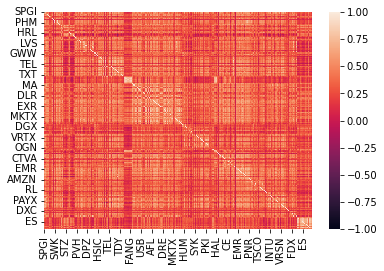

In [153]:
sns.heatmap(
    sp_500_correlations, 
    vmin=-1, 
    vmax=1,
    )

In [154]:
#sp_500_correlations.to_csv('sp500_alpacas_correlations.csv')

In [155]:
#sp_500_mins = sp_500_correlations.min(
stock = input('Enter Stock:')
row = sp_500_correlations.loc[stock]
# sp_500_correlations[f'{stock}'].min()
min_value = row.min()
min_value

Enter Stock: AAPL


0.008523055026595802

In [156]:
index_output = sp_500_correlations[row == min_value].index[0]
index_output

'NEM'

# Returns
Creating a list that calls for the user input and outputs

In [157]:
in_out_list = [stock, index_output]
portfolio = sp500_returns[in_out_list]
print(in_out_list)

['AAPL', 'NEM']


In [158]:
sp_500_correlations[in_out_list]

,AAPL,NEM
SPGI,0.568034,0.103239
MCO,0.626709,0.036098
CPRT,0.642663,-0.038547
EFX,0.545911,0.015282
FLT,0.491127,0.093220
...,...,...
LNT,0.227660,0.219722
ATO,0.264758,0.293143
NI,0.302646,0.214550
NRG,0.319507,0.103947


# Plotting Price Trends

<AxesSubplot:xlabel='timestamp'>

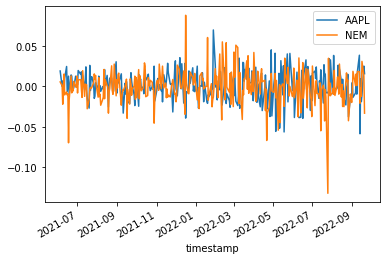

In [159]:
# Plot the data trends of the two variables over time
sp500_returns[in_out_list].plot()

# Ploting Price Relationships

<AxesSubplot:xlabel='[AAPL]', ylabel='[NEM]'>

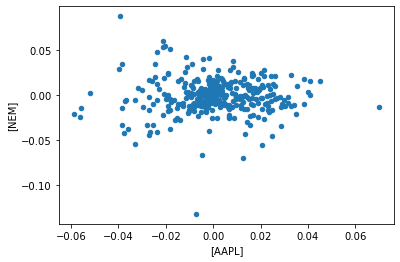

In [160]:
sp500_returns.plot(kind='scatter', x=[stock], y=[index_output])

# Ploting heatmap of the population

<AxesSubplot:>

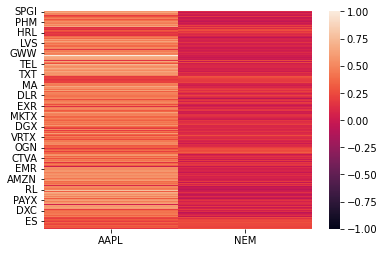

In [161]:
sns.heatmap(
    sp_500_correlations[in_out_list], 
    vmin=-1, 
    vmax=1
)

In [162]:
import plotly.express as px

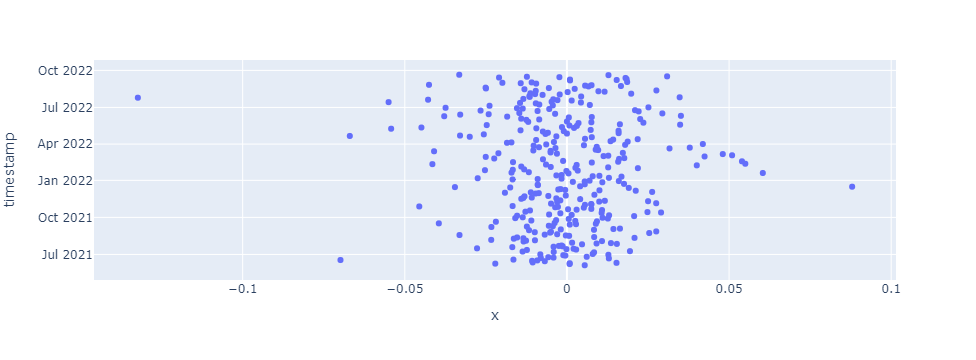

In [163]:
sp500_returns[in_out_list]
fig=px.scatter(sp500_returns[stock],sp500_returns[index_output])
fig.show()